In [ ]:
import matplotlib.pyplot as plt 
import tensorflow as tf 

# 
from sklearn.utils import shuffle 

from sklearn.preprocessing import LabelBinarizer
## build CNN 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import BatchNormalization 
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Activation
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Concatenate
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.optimizers import SGD 

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
link = "https://d17h27t6h515a5.cloudfront.net/topher/2017/February/5898cd6f_traffic-signs-data/traffic-signs-data.zip"

In [ ]:
pip install wget 

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=614d81fe0d3376cc1b152d66971f3299cd551a60cab60214bb7898976f19a2e1
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget


In [ ]:
import wget 

In [ ]:
wget.download(link)

'traffic-signs-data.zip'

In [ ]:
data = "./"

In [ ]:
!unzip -q traffic-signs-data.zip

In [ ]:
import pickle 

In [ ]:
train_link = data + "train.p"
valid_link = data + "valid.p"
test_link = data + "test.p"

In [ ]:
with open(train_link, mode = "rb") as f : 
  train = pickle.load(f) 

In [ ]:
with open(valid_link, mode = "rb") as f : 
  valid = pickle.load(f)

In [ ]:
with open(test_link, mode = "rb") as f : 
  test = pickle.load(f)

In [ ]:
trainx = train["features"]
trainy = train["labels"]

In [ ]:
display(trainx.shape)
print("there are 347799 images and 32*32*3 dimensional")

(34799, 32, 32, 3)

there are 347799 images and 32*32*3 dimensional


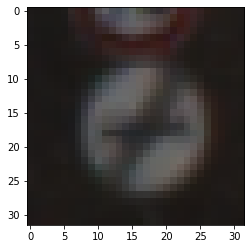

In [ ]:
plt.imshow(trainx[0])

In [ ]:
trainx,trainY = shuffle(trainx,trainy)

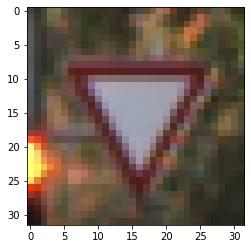

In [ ]:
plt.imshow(trainx[0])

In [ ]:
classNames = {0: 'Speed limit (20km/h)',
 1: 'Speed limit (30km/h)',
 2: 'Speed limit (50km/h)',
 3: 'Speed limit (60km/h)',
 4: 'Speed limit (70km/h)',
 5: 'Speed limit (80km/h)',
 6: 'End of speed limit (80km/h)',
 7: 'Speed limit (100km/h)',
 8: 'Speed limit (120km/h)',
 9: 'No passing',
 10: 'No passing for vehicles over 3.5 metric tons',
 11: 'Right-of-way at the next intersection',
 12: 'Priority road',
 13: 'Yield',
 14: 'Stop',
 15: 'No vehicles',
 16: 'Vehicles over 3.5 metric tons prohibited',
 17: 'No entry',
 18: 'General caution',
 19: 'Dangerous curve to the left',
 20: 'Dangerous curve to the right',
 21: 'Double curve',
 22: 'Bumpy road',
 23: 'Slippery road',
 24: 'Road narrows on the right',
 25: 'Road work',
 26: 'Traffic signals',
 27: 'Pedestrians',
 28: 'Children crossing',
 29: 'Bicycles crossing',
 30: 'Beware of ice/snow',
 31: 'Wild animals crossing',
 32: 'End of all speed and passing limits',
 33: 'Turn right ahead',
 34: 'Turn left ahead',
 35: 'Ahead only',
 36: 'Go straight or right',
 37: 'Go straight or left',
 38: 'Keep right',
 39: 'Keep left',
 40: 'Roundabout mandatory',
 41: 'End of no passing',
 42: 'End of no passing by vehicles over 3.5 metric tons'}


In [ ]:
validx = valid["features"]
validy = valid["labels"]

In [ ]:
testx = valid["features"]
testy = valid["labels"]

In [ ]:
trainx = trainx.astype("float")/255.0
validx = validx.astype("float")/255.0 
testx = testx.astype("float")/255.0

In [ ]:
trainx[0]

array([[[0.25882353, 0.26666667, 0.2745098 ],
        [0.18039216, 0.20784314, 0.18039216],
        [0.25882353, 0.27058824, 0.19215686],
        ...,
        [0.34901961, 0.29411765, 0.19215686],
        [0.22352941, 0.20784314, 0.10980392],
        [0.20784314, 0.19215686, 0.11764706]],

       [[0.30588235, 0.30588235, 0.29019608],
        [0.21568627, 0.22352941, 0.17647059],
        [0.27058824, 0.28235294, 0.17254902],
        ...,
        [0.41176471, 0.36862745, 0.24705882],
        [0.27843137, 0.28627451, 0.16862745],
        [0.25098039, 0.25882353, 0.15294118]],

       [[0.33333333, 0.33333333, 0.33333333],
        [0.23529412, 0.23529412, 0.20784314],
        [0.27058824, 0.27058824, 0.18039216],
        ...,
        [0.36862745, 0.3254902 , 0.20784314],
        [0.33333333, 0.34509804, 0.20784314],
        [0.30196078, 0.32941176, 0.16470588]],

       ...,

       [[0.2       , 0.08627451, 0.09803922],
        [0.25490196, 0.11372549, 0.10980392],
        [0.38039216, 0

In [ ]:
lb = LabelBinarizer()

In [ ]:
trainy = lb.fit_transform(trainy)
trainy

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
validy = lb.fit_transform(validy)
validy 

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
testy = lb.fit_transform(testy)
testy

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

### Build CNN 

In [ ]:
model = Sequential() 

In [ ]:
width = 32 
height = 32 
classes = 43 

In [ ]:
shape = (width, height, 3)

In [ ]:
model.add(Conv2D(32,(3,3), padding = "same", input_shape = shape))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(32,(3,3), padding = "same", input_shape = shape))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size =(2,2)))

In [ ]:
model.add(Conv2D(64,(3,3), padding = "same") )

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Conv2D(64,(3,3), padding = "same") )

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(MaxPooling2D(pool_size =(2,2)))

In [ ]:
model.add(Flatten())

In [ ]:
model.add(Dense(512))

In [ ]:
model.add(Activation("relu"))

In [ ]:
model.add(BatchNormalization())

In [ ]:
model.add(Dense(classes))

In [ ]:
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)       

### Training 

In [ ]:
aug = ImageDataGenerator(rotation_range= 0.18, zoom_range= 0.15, width_shift_range=0.2, height_shift_range= 0.2, horizontal_flip=True)

In [ ]:
learning_rate = 0.01 

In [ ]:
epochs = 2
# epochs 
# steps 
# 
batch_size = 64

In [ ]:
opt = SGD(learning_rate = learning_rate, momentum = 0.9)

In [ ]:
 model.compile(optimizer = opt, loss = "categorical_crossentropy", metrics = ["accuracy"])

## Start Training 

In [ ]:
H = model.fit_generator(aug.flow(trainx,trainy,batch_size = batch_size), validation_data = (validx, validy), steps_per_epoch = trainx.shape[0]/batch_size, epochs = epochs, verbose = 1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/2
544/543 [==============================] - 230s 422ms/step - loss: 3.7881 - accuracy: 0.0507 - val_loss: 3.7208 - val_accuracy: 0.0671
Epoch 2/2
544/543 [==============================] - 229s 421ms/step - loss: 3.6769 - accuracy: 0.0493 - val_loss: 3.8242 - val_accuracy: 0.0224


In [ ]:
model.save("Deep_learning_CNN.h5")

In [ ]:
save_model = tf.keras.models.load_model("Deep_learning_CNN.h5")

In [ ]:
result = save_model.predict(testx[100:101])

In [ ]:
result

array([[0.00650891, 0.05231089, 0.11133451, 0.0306173 , 0.0291085 ,
        0.04851462, 0.00587443, 0.02756231, 0.05744167, 0.04639329,
        0.05277473, 0.04547811, 0.06718523, 0.07184472, 0.02114646,
        0.01134996, 0.01014858, 0.02056067, 0.02605586, 0.00726679,
        0.0078527 , 0.00330278, 0.00550354, 0.0130115 , 0.00599881,
        0.02886511, 0.02024585, 0.00608042, 0.01577047, 0.00450936,
        0.00824074, 0.01687196, 0.0061895 , 0.0197921 , 0.01104084,
        0.0180179 , 0.00770958, 0.00297386, 0.02159357, 0.0044425 ,
        0.01394828, 0.00567622, 0.00288494]], dtype=float32)

In [ ]:
import numpy as np 

In [ ]:
final = np.argmax(result)



In [ ]:
final = classNames[final]

In [ ]:
final 

'Speed limit (50km/h)'

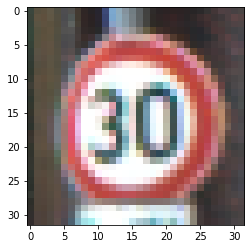

In [ ]:
plt.imshow(test["features"][1])